In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Train_fraud = pd.read_csv("/content/drive/MyDrive/BT4012 archive/Train-1542865627584.csv")
#Train_Bene = pd.read_csv("/content/drive/MyDrive/BT4012 archive/Train_Beneficiarydata-1542865627584.csv")
#Train_inpa = pd.read_csv('/content/drive/MyDrive/BT4012 archive/Train_Inpatientdata-1542865627584.csv')

Train_Bene = pd.read_csv("../raw/Train_Beneficiarydata.csv")
Train_inpa = pd.read_csvpd.read_csv("../raw/Train_Inpatientdata.csv")
Train_fraud = pd.read_csvpd.read_csv("../raw/Train.csv")

In [ ]:
Train_Beneficiary = pd.merge(Train_inpa,Train_Bene,left_on="BeneID", right_on='BeneID',how="inner")
Train_Beneficiary = pd.merge(Train_Beneficiary,Train_fraud,left_on="Provider", right_on='Provider',how="inner")

In [ ]:
  Train_Beneficiary['PotentialFraud'].value_counts()

Yes    23402
No     17072
Name: PotentialFraud, dtype: int64

In [ ]:
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'] , format = '%Y-%m-%d')
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'],format = '%Y-%m-%d',errors='ignore')
Train_Beneficiary['Age'] = round(((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB']).dt.days)/365)
Train_Beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Train_Beneficiary['DOB']).dt.days)/365),
                                 inplace=True)

In [ ]:
FraudAge = Train_Beneficiary.loc[Train_Beneficiary['PotentialFraud'] =='Yes' ,'Age']
NormalAge = Train_Beneficiary.loc[Train_Beneficiary['PotentialFraud'] =='No' ,'Age']

In [ ]:
AgedistF = FraudAge.value_counts()
AgedistN = NormalAge.value_counts()

<BarContainer object of 76 artists>

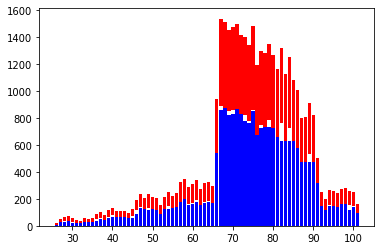

In [ ]:
plt.bar(AgedistF.index,AgedistF.values, color='b')
plt.bar(AgedistN.index,AgedistN.values, bottom = AgedistF.values, color='r')


In [ ]:
AgedistF = AgedistF.sort_index()
AgedistN = AgedistN.sort_index()
AgeNoF = AgedistN / AgedistF
AverageNoF = AgeNoF.mean()

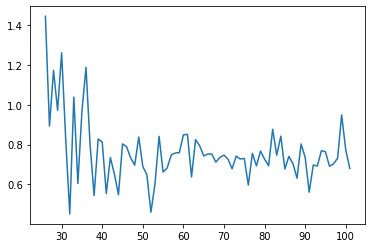

In [ ]:
AgeNoF.plot()

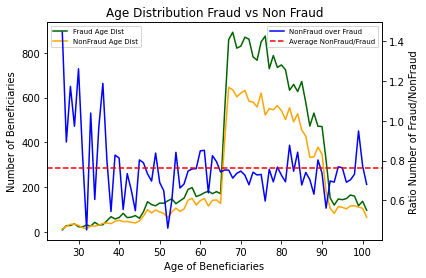

In [ ]:


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(AgedistF.index,AgedistF,  'darkgreen')
ax1.plot(AgedistN.index,AgedistN,  'orange')
ax1.legend(["Fraud Age Dist","NonFraud Age Dist"],prop={'size': 7},loc=2)
ax1.set_xlabel("Age of Beneficiaries")
ax1.set_ylabel("Number of Beneficiaries")

ax2.plot(AgeNoF.index,AgeNoF,  'b-')
plt.axhline(y = AverageNoF, color = 'r', linestyle = 'dashed')
ax2.legend(["NonFraud over Fraud", "Average NonFraud/Fraud"],prop={'size': 7})
ax2.set_ylabel("Ratio Number of Fraud/NonFraud")

plt.title('Age Distribution Fraud vs Non Fraud')
plt.show()
fig.savefig('/content/drive/MyDrive/BT4012 archive/plot.png', dpi=300)

In [ ]:
AgedistN.values

array([ 13,  25,  34,  35,  29,  19,  14,  27,  26,  30,  38,  40,  37,
        48,  52,  46,  47,  43,  40,  49,  71,  99,  85,  98,  89,  83,
        64,  89, 106,  92, 103, 142, 150, 120, 140, 149, 116, 141, 143,
       127, 404, 646, 635, 604, 620, 632, 584, 580, 558, 620, 522, 551,
       546, 564, 542, 502, 555, 492, 528, 455, 428, 333, 335, 379, 347,
       180, 106,  83, 113, 110, 103, 116, 117, 111, 106,  66])

In [ ]:
def cal_display_percentiles(x_col, y_col, title_lbl, x_filter_code):
    """
    Description : This function is created for calculating and generating the percentiles for pre-disease indicators.
    
    Input: It accepts below parameters:
        1. x_col : Disease indicator feature name.
        2. y_col : Feature like re-imbursement or deductible amount whose percentiles you want to generate.
        3. title_lbl : Label to be provided in the title of the plot.
        4. x_filter_code : Category code for which you want to generate the percentiles.
        
    Output: It returns the dataframe having percentiles and their respective values for the specific disease indicator feature.
    And, it displays the pointplot graph of the same.
    """
    percentiles = []
    percentiles_vals = []

    # Calculating & storing the various percentiles and their respective values
    for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
        percentile = round(float(val*100),6)
        percentiles.append(percentile)

        percentile_val = round(Train_Beneficiary[Train_Beneficiary[x_col] == x_filter_code][y_col].quantile(val),1)
        percentiles_vals.append(percentile_val)

    # Creating the temp dataframe for displaying the results
    tmp_percentiles = pd.DataFrame([percentiles, percentiles_vals]).T
    tmp_percentiles.columns = ['Percentiles', 'Values']

    # Here, I'm displaying the Percentiles values for all disease code features
    with plt.style.context('seaborn-poster'):
        plt.figure(figsize=(15,7))
        sns.pointplot(data=tmp_percentiles, x='Percentiles', y='Values', markers="o", palette='spring')
        sns.pointplot(data=tmp_percentiles, x='Percentiles', y='Values', markers="", color='grey', linestyles="solid")
        # Providing the labels and title to the graph
        plt.xlabel("\nPercentiles")
        plt.xticks(rotation=90, size=12)
        plt.ylabel("Total Annual `{}` Sum \n".format(y_col))
        plt.grid(which='major', linestyle="-.", color='lightpink')
        plt.minorticks_on()
        plt.title("Percentile values of `{}` :: `{}`\n".format(y_col,title_lbl))
        
    return tmp_percentiles

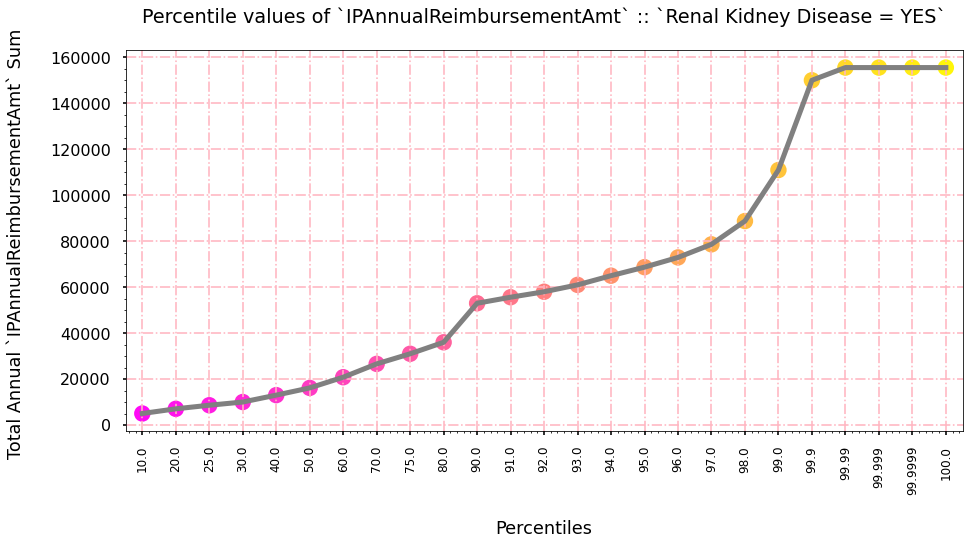

In [ ]:
RKD_YES_IP_R_percentiles = cal_display_percentiles(x_col='RenalDiseaseIndicator', 
                                                   y_col='IPAnnualReimbursementAmt',
                                                   title_lbl="Renal Kidney Disease = YES",
                                                   x_filter_code='Y')


In [ ]:
FraudState = Train_Beneficiary.loc[Train_Beneficiary['PotentialFraud'] =='Yes' ,'State']
NonFraudState = Train_Beneficiary.loc[Train_Beneficiary['PotentialFraud'] =='No' ,'State']

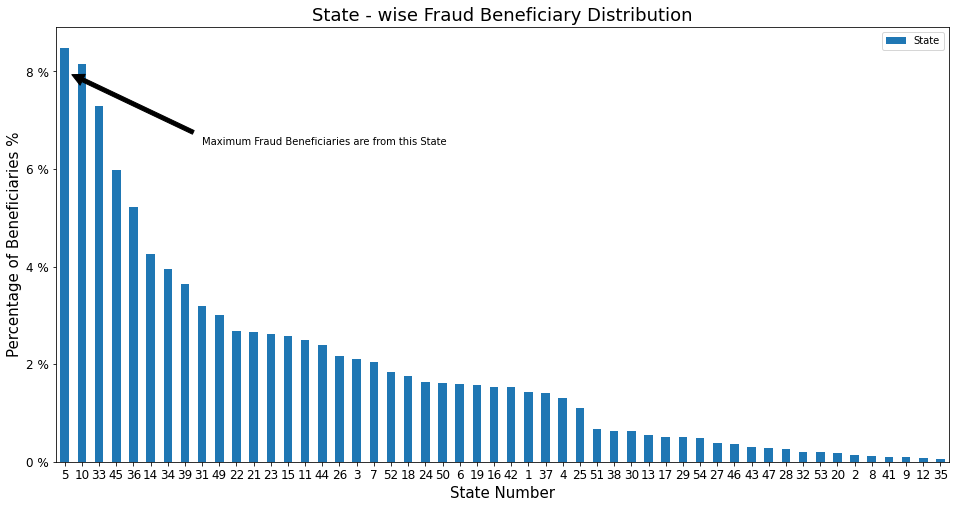

In [ ]:
#PLotting the frequencies of Statewise beneficiaries
count_States = pd.value_counts(FraudState, sort = True)
#print("Percent Distribution of Beneficieries per state:- \n",count_States*100/len(Train_Beneficiarydata))

#Drawing a barplot
(count_States*100/len(FraudState)).plot(kind = 'bar', rot=0,figsize=(16,8),fontsize=12,legend=True)


#Giving titles and labels to the plot

plt.annotate('Maximum Fraud Beneficiaries are from this State', xy=(0.01,8), xytext=(8, 6.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.yticks(np.arange(0,10,2), ('0 %','2 %', '4 %', '6 %', '8 %', '10%'))
plt.title("State - wise Fraud Beneficiary Distribution",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)
#plt.show()

plt.savefig('/content/drive/MyDrive/BT4012 archive/StateWiseFraudBeneficiaryDistribution.png', dpi = 300)

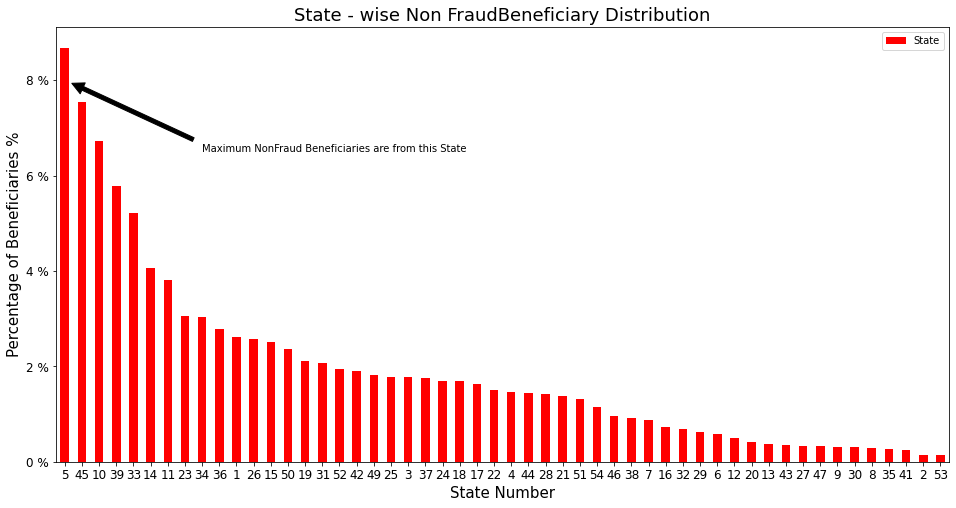

In [ ]:
#PLotting the frequencies of Statewise beneficiaries
count_States = pd.value_counts(NonFraudState, sort = True)
#print("Percent Distribution of Beneficieries per state:- \n",count_States*100/len(Train_Beneficiarydata))

#Drawing a barplot
(count_States*100/len(NonFraudState)).plot(kind = 'bar', rot=0,figsize=(16,8),fontsize=12,legend=True, color = "red")

#Giving titles and labels to the plot

plt.annotate('Maximum NonFraud Beneficiaries are from this State', xy=(0.01,8), xytext=(8, 6.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.yticks(np.arange(0,10,2), ('0 %','2 %', '4 %', '6 %', '8 %', '10%'))
plt.title("State - wise Non FraudBeneficiary Distribution",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)
#plt.show()

plt.savefig('/content/drive/MyDrive/BT4012 archive/StateWiseNonFraudBeneficiaryDistribution.png', dpi = 300)